In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

### Detect if train ticket

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from Project import Project
from pathlib import Path

project = Project()

def imshows(ims):
    np.stack()

def imshow(im):
    fig = plt.figure()
    if len(im.shape): plt.imshow(im, cmap='gray')
    else:
        plt.imshow(im)
    return fig

<IPython.core.display.Javascript object>


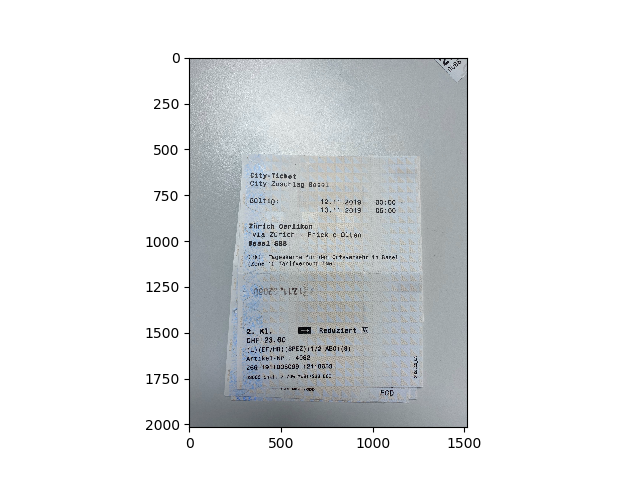

In [59]:
tickets_path = project.data_dir / 'tickets'

tickets = list(map(lambda x: cv2.imread(str(x)), tickets_path.glob('*.jpg')))
_ = imshow(tickets[0])

### OCR directly

In [14]:
import pytesseract
from PIL import Image
pytesseract.pytesseract.tesseract_cmd =r'C:\Program Files\Tesseract-OCR\tesseract'
x = Image.fromarray(tickets[0])
pytesseract.image_to_string(x)

'City-Ticket\nCity-Zuschlag Basel\n\n‘Giltig: 12.11.2019 00:00 -\nSede: 13.11.2019 05:00\n_ 2iirich Oerlikon ne\n“via Zurich - Frick o Olten\nel SBB a\n\nTageskarte flr den Ortsverkehr in Basel\n10 Tarifverbund TNW).'

not so good, let's try some preprocessing

In [15]:
??cv2.Canny

<IPython.core.display.Javascript object>


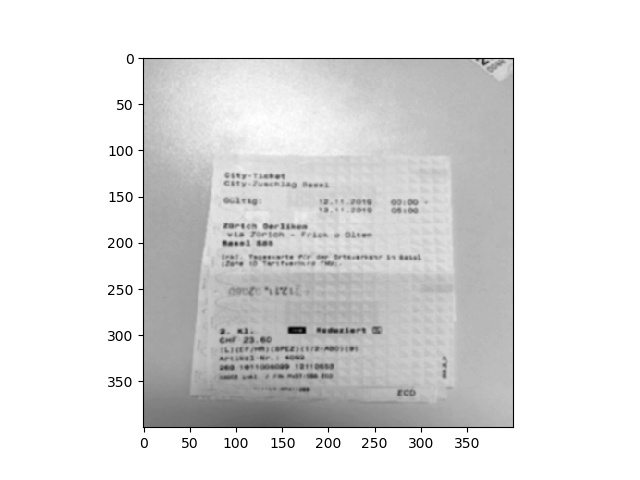

<IPython.core.display.Javascript object>


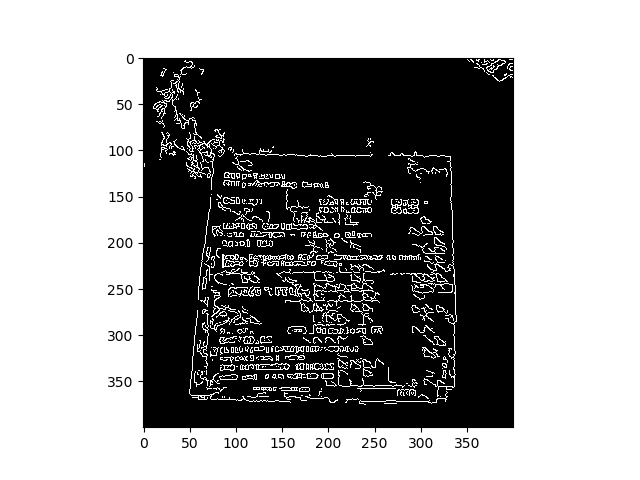

In [62]:
img_r = cv2.resize(tickets[0], (400, 400))
img_r = cv2.cvtColor(img_r, cv2.COLOR_BGR2GRAY)
img_r = cv2.GaussianBlur(img_r, (5, 5), 0)
img_r = cv2.convertScaleAbs(img_r, alpha=1, beta=0.5)
imshow(img_r)
edged = cv2.Canny(img_r, 15, 50)
imshow(edged)
contours, hierarchy  = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [93]:
contours.sort(key=cv2.contourArea)

peri = cv2.arcLength(contours[-1], True)
approx = cv2.approxPolyDP(contours[-1],  0.1 * peri, True)

In [94]:
approx

array([[[158, 333]],

       [[105, 337]]], dtype=int32)

<IPython.core.display.Javascript object>


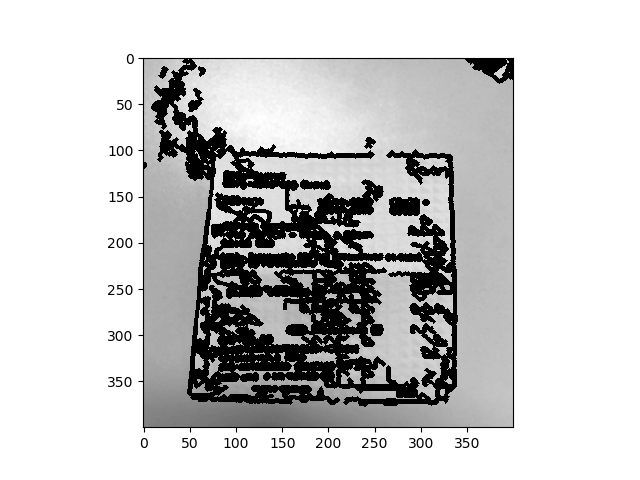

In [95]:
_ = imshow(cv2.drawContours(img_r, approx, -1, (0,255,0), 2))